In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('WaveData', batch_size = 13, color_mode='grayscale')

Found 130 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

In [5]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

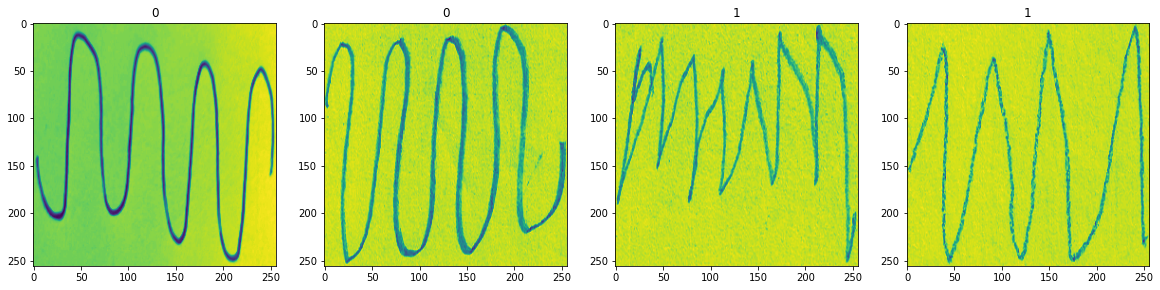

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x, y : (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
scaled_iterator = data.as_numpy_iterator()

In [9]:
batch = scaled_iterator.next()

In [10]:
batch[0]

array([[[[0.9508502 ],
         [0.9392808 ],
         [0.9583027 ],
         ...,
         [0.94744945],
         [0.95032936],
         [0.869807  ]],

        [[0.94764477],
         [0.94234836],
         [0.9431372 ],
         ...,
         [0.9523782 ],
         [0.9313725 ],
         [0.85487133]],

        [[0.9532667 ],
         [0.95066255],
         [0.94736904],
         ...,
         [0.88956034],
         [0.93560433],
         [0.92679226]],

        ...,

        [[0.9287531 ],
         [0.91467905],
         [0.9244753 ],
         ...,
         [0.8754787 ],
         [0.9261336 ],
         [0.92974496]],

        [[0.9451057 ],
         [0.8954848 ],
         [0.93687195],
         ...,
         [0.90785843],
         [0.918233  ],
         [0.9278416 ]],

        [[0.96601564],
         [0.93392694],
         [0.9449027 ],
         ...,
         [0.9231388 ],
         [0.91954273],
         [0.91228557]]],


       [[[0.8403799 ],
         [0.83748466],
         [0.84

In [11]:
print("Min value after scaling is ", batch[0].min())
print("Max value after scaling is ", batch[0].max())

Min value after scaling is  0.06499275
Max value after scaling is  1.0


In [12]:
len(data)

10

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size+val_size+test_size

10

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [22]:
hist = model.fit(train, validation_data=val, epochs=15)

Epoch 1/15
7/7 [==============================] - 10s 1s/step - loss: 3.0290 - accuracy: 0.5165 - val_loss: 0.8600 - val_accuracy: 0.3462
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 0.6988 - accuracy: 0.5824 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 3/15
7/7 [==============================] - 9s 1s/step - loss: 0.7317 - accuracy: 0.3516 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.6968 - accuracy: 0.4945 - val_loss: 0.7035 - val_accuracy: 0.3846
Epoch 5/15
7/7 [==============================] - 9s 1s/step - loss: 0.6868 - accuracy: 0.5165 - val_loss: 0.6832 - val_accuracy: 0.5769
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.6663 - accuracy: 0.6154 - val_loss: 0.6591 - val_accuracy: 0.5000
Epoch 7/15
7/7 [==============================] - 9s 1s/step - loss: 0.6838 - accuracy: 0.5385 - val_loss: 0.6579 - val_accuracy: 0.4231
Epoch 8/15
7/7 [========================

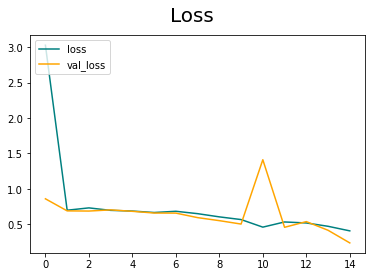

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

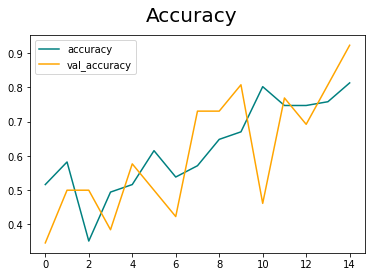

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 210ms/step


In [28]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.8333333134651184, Recall: 1.0, Accuracy: 0.8461538553237915


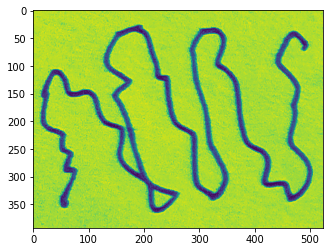

In [85]:
img = cv2.imread('WTest11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [86]:
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img.shape

(1, 256, 256, 1)

In [87]:
yhat = model.predict(img)

1/1 [==============================] - 0s 75ms/step


In [88]:
if (yhat<0.5):
    print("Healthy")
else:
    print("Parkinson")

Parkinson


# Testing

In [2]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models','WAVE_V01.h5'))

In [4]:
new_model = load_model('models/Wave_V01.h5')

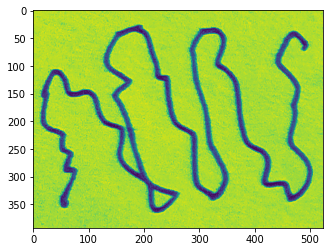

In [107]:
img = cv2.imread('WTest11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [108]:
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img.shape

(1, 256, 256, 1)

In [109]:
yhat = new_model.predict(img)

1/1 [==============================] - 0s 68ms/step


In [110]:
if (yhat<0.5):
    print("Healthy")
else:
    print("Parkinson")

Parkinson
